In [1]:
import sys
sys.path.append('./../model/')

import jax
import jax.numpy as jnp
import scipy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import time
from hankel_ellipsoid_jax import Correlator_ellipsoid

jax.config.update("jax_enable_x64", True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : True,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()],
          "text.latex.preamble" : r"\usepackage{amsmath}"}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [4]:
r = np.logspace(-6,np.log10(10),1024)

lam0 = 656.46e-9
nu0 = const.c/lam0

nu_obs = jnp.arange(0.95, 1.05, .001)*nu0

dist_0 = 1e7

th_max_std = 8e6*30*const.day/const.parsec/dist_0

In [5]:
@jax.jit
def create_jax_football():
    p_cyg = Correlator_ellipsoid(nu_obs = nu_obs, r_ar = r*th_max_std, nu0 = nu0, v0 = 8e6,
                                 ds = const.parsec*dist_0, t = 30*const.day, tau0 = 2, n = 5, eta = 2, theta = 0,
                                 ang_obs = jnp.arange(0,np.pi,np.pi/100))

    spec = p_cyg._phot_N(6000)
    return p_cyg, spec 


@jax.jit
def create_jax_pancake():
    p_cyg = Correlator_ellipsoid(nu_obs = nu_obs, r_ar = r*th_max_std, nu0 = nu0, v0 = 8e6,
                                 ds = const.parsec*dist_0, t = 30*const.day, tau0 = 2, n = 5, eta = .5, theta = 0,
                                 ang_obs = jnp.arange(0,np.pi,np.pi/100))

    spec = p_cyg._phot_N(6000)
    return p_cyg, spec 


@jax.jit
def create_jax_sphere():
    p_cyg = Correlator_ellipsoid(nu_obs = nu_obs, r_ar = r*th_max_std, nu0 = nu0, v0 = 8e6,
                                 ds = const.parsec*dist_0, t = 30*const.day, tau0 = 2, n = 5, eta = 1, theta = 0,
                                 ang_obs = jnp.arange(0,np.pi,np.pi/100))

    spec = p_cyg._phot_N(6000)
    return p_cyg, spec 

In [6]:
p_cyg_football, spec_signal = create_jax_football()
p_cyg_pancake, _ = create_jax_pancake()
p_cyg_sphere, _ = create_jax_sphere()

Text(0.5, 1.0, '$v_\\parallel t = 1.12~$$r_\\text{ph}$')

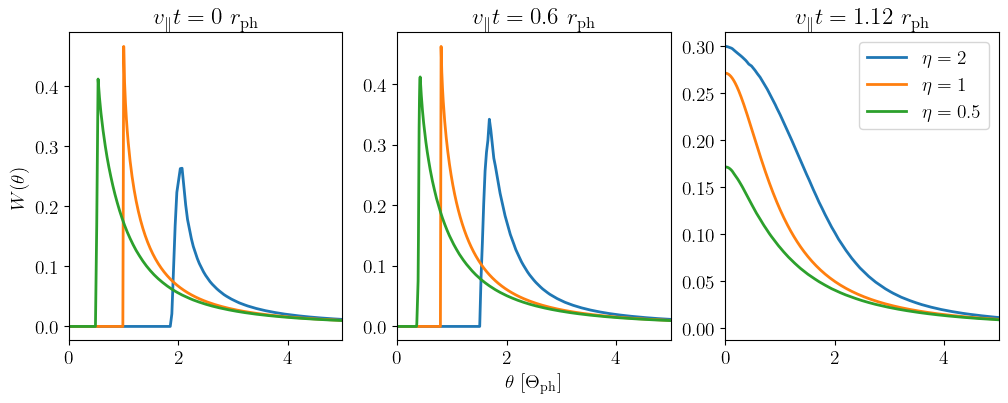

In [7]:
plt.figure(figsize = (12,4))

ang = 0
k = 50

y0 = np.array(p_cyg_football.geo_w[:,ang,k])
plt.subplot(131)

plt.plot(r, p_cyg_football.geo_w[:,ang,k], lw = 2, label = r'$\eta = 2$')
plt.plot(r, np.nan_to_num(1/2*(1-np.sqrt(1-1/r**2)), 0), lw = 2, label = r'$\eta = 1$')
plt.plot(r, p_cyg_pancake.geo_w[:,ang,k], lw = 2, label = r'$\eta = 0.5$')

plt.xlim(0,5)

plt.ylabel(r'$W(\mathbf{\theta})$')
plt.title(r'$v_\parallel t = 0~r_\text{ph}$')

ang = 0
k = 34
v = (1 - nu_obs[k]/nu0)*const.c/8e6

plt.subplot(132)
plt.plot(r, p_cyg_football.geo_w[:,ang,k], lw = 2, label = r'$\eta = 2$')
plt.plot(r, np.nan_to_num(1/2*(1-np.sqrt(1-1/(r**2 + v**2))), 0), lw = 2, label = r'$\eta = 1$')
plt.plot(r, p_cyg_pancake.geo_w[:,ang,k], lw = 2, label = r'$\eta = 0.5$')

plt.xlim(0,5)

plt.xlabel(r'$\theta~[\Theta_\text{ph}]$')
plt.title(rf'$v_\parallel t = {np.round(v,2)}~$' + r'$r_\text{ph}$')

ang = 0
k = 20
v = (1 - nu_obs[k]/nu0)*const.c/8e6

plt.subplot(133)
plt.plot(r, p_cyg_football.geo_w[:,ang,k], lw = 2, label = r'$\eta = 2$')
plt.plot(r, np.nan_to_num(1/2*(1-np.sqrt(1-1/(r**2 + v**2))), 0), lw = 2, label = r'$\eta = 1$')
plt.plot(r, p_cyg_pancake.geo_w[:,ang,k], lw = 2, label = r'$\eta = 0.5$')

plt.xlim(0,5)
plt.legend()
plt.title(rf'$v_\parallel t = {np.round(v,2)}~$' + r'$r_\text{ph}$')

#plt.savefig('geo_w.pdf', bbox_inches = 'tight')